# Weeks 5 & 6 Exercises

## Understanding Packages

Amelia Farrell

DSC540

4/14/23

In [1]:

# Connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

# Change to the google drive directory
%cd /content/drive/MyDrive/Colab\ Notebooks/DSC540

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/DSC540


## Data Wrangling with Python: Activity 7, page 207

Reading Tabular Data from a Web Page and Creating DataFrames

In [2]:
# importing libraries needed
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [3]:
# fter saving the wikipedia HTML data, we can read the file using BeautifulSoup
fd = open("List of countries by GDP (nominal) - Wikipedia.html", "r")
soup = BeautifulSoup(fd)
fd.close()

# reading the page Wikipedia page tusing bs4
#URL = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
##r = requests.get(URL) 
#soup = BeautifulSoup(r.content, 'html5lib')
#print(soup.prettify())

In [5]:
# cacluation the number of tables
all_tables = soup.find_all("table")
print("Total number of tables: {} ".format(len(all_tables)))

Total number of tables: 9 


In [6]:
# idenifying the right table
data_table = soup.find("table", {"class": '"wikitable"|}'})
print(type(data_table))

<class 'bs4.element.Tag'>


In [ ]:
gdp = soup.find("table",attrs={"class":"wikitable"})
data = gdp.tbody.find_all("tr")
data

In [ ]:
# separatating the source and the actual data from the table
sources = data_table.tbody.findAll('tr', recursive=False)[0]
sources_list = [td for td in sources.findAll('td')]
print(len(sources_list))

3


In [ ]:
data = data_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)

data_tables = []
for td in data:
    data_tables.append(td.findAll('table'))

len(data_tables)

3

In [ ]:
# seperating the header names from the data (for the first FRIST only)
header1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')[0].findAll('th')]
header1 # idenifying the headers

['Rank', 'Country', 'GDP(US$MM)']

In [ ]:
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:] # idenifying the rows
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1] # data for rows
df1 = pd.DataFrame(data_rows1, columns=header1) # creating the dataframe
df1.head() # showing the new dataframe with headers and first rows

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"
4,5,United Kingdom,"2,624,529"


In [ ]:
# seperating the header names from the data (for the SECOND source)
header2 = [th.getText().strip() for th in data_tables[1][0].findAll('thead')[0].findAll('th')] # selecting 2nd table headers
rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:] # selecting 2nd table rows

def find_right_text(i, td): #creating a function to find 2nd table data
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find("♠")
        return td.text[index+1:].strip()

data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2] # selecting 2nd table data using our new function
df2 = pd.DataFrame(data_rows2, columns=header2)
df2.head() # showing the new dataframe with headers and first rows

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


In [ ]:
# seperating the header names from the data (for the THIRD source)
header3 = [th.getText().strip() for th in data_tables[2][0].findAll('thead')[0].findAll('th')] # selecting 3rd table headers
rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:] # selecting 2nd table rows
data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows3] # selecting 2nd table data using our new function
df3 = pd.DataFrame(data_rows3, columns=header3)
df3.head() # showing the new dataframe with headers and first rows

,Rank,Country,GDP(US$MM)
0,1,United States,"18,624,475"
1,2,China[n 4],"11,218,281"
2,3,Japan,"4,936,211"
3,4,Germany,"3,477,796"
4,5,United Kingdom,"2,647,898"


## Data Wrangling with Python: Activity 8, page 233

Handling of Outliers and Missing Data

In [8]:
# importing libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# reading csv file
df = pd.read_csv('visit_data.csv')
df

# pd.read_csv does not beak out the columns due to "" on each line within the file
# to sove this, we will remove the qoutes prior to reading to a dataframe

#print(open('visit_data_new.csv', "r").read())

with open('visit_data.csv', "r") as f:
   for line in f:
     with open("visit_data_new.csv", "a") as w:
       w.write(line.strip('\"'))



In [17]:
# cheking for duplicates
print("First name is duplictaed - {}".format(any(df.first_name.duplicated())))
print("Last name is duplictaed - {}".format(any(df.last_name.duplicated())))
print("Email is duplictaed - {}".format(any(df.email.duplicated())))

First name is duplictaed - True
Last name is duplictaed - True
Email is duplictaed - False


In [18]:
# checking for NaNs (in essntial columns)
print("The column Email contains NaN - %r " % df.email.isnull().values.any())
print("The column IP Address contains NaN - %s " % df.ip_address.isnull().values.any())
print("The column Visit contains NaN - %s " % df.visit.isnull().values.any())

The column Email contains NaN - False 
The column IP Address contains NaN - False 
The column Visit contains NaN - True 


In [19]:
# removing outliers (from the visit column)
size_prev = df.shape
df2 = df[np.isfinite(df['visit'])] # creating new data frame in order to keep the oringal for refrence
size_after = df2.shape

In [34]:
# calulation the size difference
print("The size of previous data was - {prev[0]} rows and the size of the new (without NaNs) is - {after[0]} rows".
      format(prev=size_prev, after=size_after))

The size of previous data was - 1000 rows and the size of the new (without NaNs) is - 974 rows


{'whiskers': [<matplotlib.lines.Line2D at 0x7f93742e7a00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f93742e7f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f93742e7760>],
 'medians': [<matplotlib.lines.Line2D at 0x7f93742c1e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f93744dbc10>],
 'means': []}

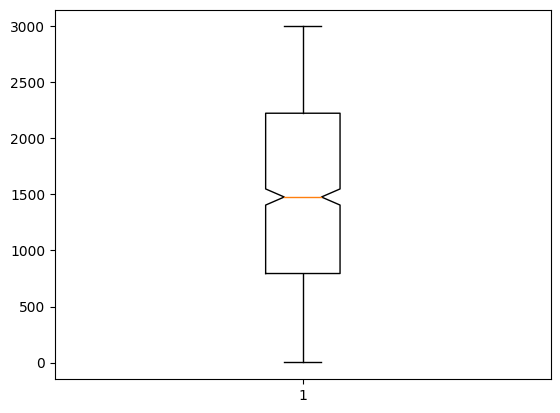

In [26]:
# creating a box plot to vislize any other outliers
plt.boxplot(df2.visit, notch=True)

In [32]:
# removing the 0 and 3,000 outlier points seen above (in a 3rd data frame df3)
df3 = df2[(df2['visit'] <= 2900) & (df2['visit'] >= 100)]

In [31]:
print("After removing the two outliers shown above, the new size of the data is - {}".format(*df3.shape))

After removing the two outliers shown above, the new size of the data is - 923


## SQL Lite database

Inserting data into a SQL Lite database with 10 rows of data

In [ ]:
# importing libraries needed
import sqlite3
from prettytable import PrettyTable

In [ ]:
# connecting to database
conn = sqlite3.connect('sqlitedatabase.db')

# creating a cursor object
cursor = conn.cursor()

# Creating a table
cursor.execute('''CREATE TABLE contacts8
             (id INTEGER PRIMARY KEY, Name Text, Address text, City Text, Zip integer, \"Phone Number\" integer)''') # using  \"\" for header with spaces

In [ ]:
# Adding 10 rows of data to the database
cursor.execute("INSERT INTO contacts8 (Name, Address, City, Zip, \"Phone Number\") VALUES ('John Doe', '99 Best St','Cool Town', 10026, 2224340000)")
cursor.execute("INSERT INTO contacts8 (Name, Address, City, Zip, \"Phone Number\") VALUES ('Mary Doe', '99 Best St','Cool Town', 10026, 2224341111)")
cursor.execute("INSERT INTO contacts8 (Name, Address, City, Zip, \"Phone Number\") VALUES ('Susan Feild', '12 Flower Lane','Cool Town', 10026, 2224342323)")
cursor.execute("INSERT INTO contacts8 (Name, Address, City, Zip, \"Phone Number\") VALUES ('Jonny Appleseed', '1 Jonny St','My Town', 10028, 2228881111)")
cursor.execute("INSERT INTO contacts8 (Name, Address, City, Zip, \"Phone Number\") VALUES ('Zuko Keosho', '56 Fire St','Fire Nationa Capital', 99999, 9990001111)")
cursor.execute("INSERT INTO contacts8 (Name, Address, City, Zip, \"Phone Number\") VALUES ('Azula Keosho', '57 Fire St','Fire Nationa Capital', 99999, 9990002222)")
cursor.execute("INSERT INTO contacts8 (Name, Address, City, Zip, \"Phone Number\") VALUES ('Ang Last', '1 Air St','Eastern Air Temple', 10000, 2224346565)")
cursor.execute("INSERT INTO contacts8 (Name, Address, City, Zip, \"Phone Number\") VALUES ('Max Keosho', '6 Fire St','Fire Nationa Capital', 99999, 99900065654)")
cursor.execute("INSERT INTO contacts8 (Name, Address, City, Zip, \"Phone Number\") VALUES ('Lexi Vomo', '10 Air St','Eastern Air Temple', 10000, 2224347658)")
cursor.execute("INSERT INTO contacts8 (Name, Address, City, Zip, \"Phone Number\") VALUES ('Alexa Keosho', '8 Fire St','Fire Nationa Capital', 99999, 9990004312)")

# commiting our changes to the database
conn.commit()

In [ ]:
# selecting the table in SQL
cursor.execute("SELECT * FROM contacts8")
rows = cursor.fetchall()

# printing the table
for row in rows:
    print(row)

(1, 'John Doe', '99 Best St', 'Cool Town', 10026, 2224340000)
(2, 'Mary Doe', '99 Best St', 'Cool Town', 10026, 2224341111)
(3, 'Susan Feild', '12 Flower Lane', 'Cool Town', 10026, 2224342323)
(4, 'Jonny Appleseed', '1 Jonny St', 'My Town', 10028, 2228881111)
(5, 'Zuko Keosho', '56 Fire St', 'Fire Nationa Capital', 99999, 9990001111)
(6, 'Azula Keosho', '57 Fire St', 'Fire Nationa Capital', 99999, 9990002222)
(7, 'Ang Last', '1 Air St', 'Eastern Air Temple', 10000, 2224346565)
(8, 'Max Keosho', '6 Fire St', 'Fire Nationa Capital', 99999, 99900065654)
(9, 'Lexi Vomo', '10 Air St', 'Eastern Air Temple', 10000, 2224347658)
(10, 'Alexa Keosho', '8 Fire St', 'Fire Nationa Capital', 99999, 9990004312)


In [ ]:
# showing our SQL database as a table
table = PrettyTable(['ID', 'Name', 'Address', 'City', 'Zip', 'Phone Number']) # creating a PrettyTable object and set column names

# adding rows to the table
for row in rows:
    table.add_row(row)

# printing the "pretty" table
print(table) 

# closing connection to database
conn.close()

+----+-----------------+----------------+----------------------+-------+--------------+
| ID |       Name      |    Address     |         City         |  Zip  | Phone Number |
+----+-----------------+----------------+----------------------+-------+--------------+
| 1  |     John Doe    |   99 Best St   |      Cool Town       | 10026 |  2224340000  |
| 2  |     Mary Doe    |   99 Best St   |      Cool Town       | 10026 |  2224341111  |
| 3  |   Susan Feild   | 12 Flower Lane |      Cool Town       | 10026 |  2224342323  |
| 4  | Jonny Appleseed |   1 Jonny St   |       My Town        | 10028 |  2228881111  |
| 5  |   Zuko Keosho   |   56 Fire St   | Fire Nationa Capital | 99999 |  9990001111  |
| 6  |   Azula Keosho  |   57 Fire St   | Fire Nationa Capital | 99999 |  9990002222  |
| 7  |     Ang Last    |    1 Air St    |  Eastern Air Temple  | 10000 |  2224346565  |
| 8  |    Max Keosho   |   6 Fire St    | Fire Nationa Capital | 99999 | 99900065654  |
| 9  |    Lexi Vomo    |   10 Ai